In [55]:
import csv
import pandas as pd
import re
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt 
%matplotlib inline

In [32]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [33]:
tsv_file = open("data/movieRemakesManuallyCleaned.tsv")

In [34]:
read_tsv = csv.reader(tsv_file, delimiter = "\t")

In [35]:
cleaned_df = pd.read_csv("data/movieRemakesManuallyCleaned.tsv", sep = '\t',  error_bad_lines=False, header=None)

b'Skipping line 208: expected 13 fields, saw 22\n'


In [36]:
cleaned_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,14141235,12_(2007_film),The jury decides whether a young Chechen boy i...,11081144,12_Angry_Men_(1997_film),After the final closing arguments have been pr...,11094452.0,Ek_Ruka_Hua_Faisla,The story begins in a courtroom where a teenag...,92605.0,12_Angry_Men_(1957_film),The story begins in a courtroom where an 18-ye...
1,2,21798180,13_(2010_film),"Vincent ""Vince"" Ferro overhears people talkin...",4734122,13_Tzameti,"The film follows 22-year-old Sébastien, a Geor...",NaN,NaN,NaN,NaN,NaN,NaN
2,3,2678295,The_13th_Letter,The film noir concerns a doctor at a Canadian ...,3653768,Le_Corbeau,In a small French town identified as 'anywhere...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,179326,101_Dalmatians_(1996_film),American video game designer Roger Dearly liv...,179351,One_Hundred_and_One_Dalmatians,Songwriter Roger Radcliffe lives in a bachelor...,NaN,NaN,NaN,NaN,NaN,NaN
4,5,7034456,2001_Maniacs,Six prep college students and a biker couple t...,3327237,Two_Thousand_Maniacs!,Six Yankee tourists are lured into the fiction...,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
cleaned_df.columns = ['cluster_id', 'movie_id','title','plot_summary', 'movie_id_2','title_2','plot_summary_2','movie_id_3','title_3','plot_summary_3','movie_id_4','title_4','plot_summary_4']

In [38]:
cleaned_df.head()

,cluster_id,movie_id,title,plot_summary,movie_id_2,title_2,plot_summary_2,movie_id_3,title_3,plot_summary_3,movie_id_4,title_4,plot_summary_4
0,1,14141235,12_(2007_film),The jury decides whether a young Chechen boy i...,11081144,12_Angry_Men_(1997_film),After the final closing arguments have been pr...,11094452.0,Ek_Ruka_Hua_Faisla,The story begins in a courtroom where a teenag...,92605.0,12_Angry_Men_(1957_film),The story begins in a courtroom where an 18-ye...
1,2,21798180,13_(2010_film),"Vincent ""Vince"" Ferro overhears people talkin...",4734122,13_Tzameti,"The film follows 22-year-old Sébastien, a Geor...",NaN,NaN,NaN,NaN,NaN,NaN
2,3,2678295,The_13th_Letter,The film noir concerns a doctor at a Canadian ...,3653768,Le_Corbeau,In a small French town identified as 'anywhere...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,179326,101_Dalmatians_(1996_film),American video game designer Roger Dearly liv...,179351,One_Hundred_and_One_Dalmatians,Songwriter Roger Radcliffe lives in a bachelor...,NaN,NaN,NaN,NaN,NaN,NaN
4,5,7034456,2001_Maniacs,Six prep college students and a biker couple t...,3327237,Two_Thousand_Maniacs!,Six Yankee tourists are lured into the fiction...,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
cleaned_df['cluster_id_2'] = cleaned_df[['cluster_id']]
cleaned_df['cluster_id_3'] = cleaned_df[['cluster_id']]
cleaned_df['cluster_id_4'] = cleaned_df[['cluster_id']]

## Stacking Data - Converting to Long Format

In [40]:
chunk_2 = cleaned_df[['cluster_id_2', 'movie_id_2','title_2','plot_summary_2']]
chunk_3 = cleaned_df[['cluster_id_3', 'movie_id_3','title_3','plot_summary_3']]
chunk_4 = cleaned_df[['cluster_id_4', 'movie_id_4','title_4','plot_summary_4']]

chunk_2.columns = ['cluster_id', 'movie_id','title','plot_summary']
chunk_3.columns = ['cluster_id', 'movie_id','title','plot_summary']
chunk_4.columns = ['cluster_id', 'movie_id','title','plot_summary']

new_df = cleaned_df[['cluster_id', 'movie_id','title','plot_summary']]
new_df = new_df.append(chunk_2)
new_df = new_df.append(chunk_3)
new_df = new_df.append(chunk_4)

new_df.shape

(1060, 4)

In [41]:
new_df.head()

,cluster_id,movie_id,title,plot_summary
0,1,14141235.0,12_(2007_film),The jury decides whether a young Chechen boy i...
1,2,21798180.0,13_(2010_film),"Vincent ""Vince"" Ferro overhears people talkin..."
2,3,2678295.0,The_13th_Letter,The film noir concerns a doctor at a Canadian ...
3,4,179326.0,101_Dalmatians_(1996_film),American video game designer Roger Dearly liv...
4,5,7034456.0,2001_Maniacs,Six prep college students and a biker couple t...


In [42]:
new_df.dropna(subset = ['movie_id'], inplace = True)

In [43]:
new_df.shape

(570, 4)

In [44]:
new_df.sort_values(by = ['cluster_id'], inplace = True)

In [45]:
new_df.head(n= 10)

,cluster_id,movie_id,title,plot_summary
0,1,14141235.0,12_(2007_film),The jury decides whether a young Chechen boy i...
0,1,11094452.0,Ek_Ruka_Hua_Faisla,The story begins in a courtroom where a teenag...
0,1,92605.0,12_Angry_Men_(1957_film),The story begins in a courtroom where an 18-ye...
0,1,11081144.0,12_Angry_Men_(1997_film),After the final closing arguments have been pr...
1,2,21798180.0,13_(2010_film),"Vincent ""Vince"" Ferro overhears people talkin..."
1,2,4734122.0,13_Tzameti,"The film follows 22-year-old Sébastien, a Geor..."
2,3,3653768.0,Le_Corbeau,In a small French town identified as 'anywhere...
2,3,2678295.0,The_13th_Letter,The film noir concerns a doctor at a Canadian ...
3,4,179351.0,One_Hundred_and_One_Dalmatians,Songwriter Roger Radcliffe lives in a bachelor...
3,4,179326.0,101_Dalmatians_(1996_film),American video game designer Roger Dearly liv...


In [47]:
cleaned_df.head()

,cluster_id,movie_id,title,plot_summary
0,1,14141235.0,12_(2007_film),The jury decides whether a young Chechen boy i...
0,1,11094452.0,Ek_Ruka_Hua_Faisla,The story begins in a courtroom where a teenag...
0,1,92605.0,12_Angry_Men_(1957_film),The story begins in a courtroom where an 18-ye...
0,1,11081144.0,12_Angry_Men_(1997_film),After the final closing arguments have been pr...
1,2,21798180.0,13_(2010_film),"Vincent ""Vince"" Ferro overhears people talkin..."


## Looking Into the Dataset

In [49]:
import nltk

In [51]:
def text_length(x):
    return len(word_tokenize(x))

In [56]:
def sent_length(x):
    return len(sent_tokenize(x))

In [52]:
cleaned_df['num_words'] = cleaned_df['plot_summary'].apply(text_length)

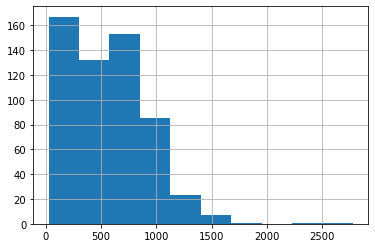

In [53]:
cleaned_df['num_words'].hist()

In [59]:
cleaned_df['num_sents'] = cleaned_df['plot_summary'].apply(sent_length)

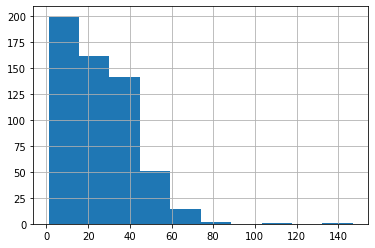

In [60]:
cleaned_df['num_sents'].hist()

In [54]:
cleaned_df['num_words'].describe()

count     570.000000
mean      564.663158
std       363.544896
min        26.000000
25%       262.000000
50%       542.500000
75%       806.250000
max      2777.000000
Name: num_words, dtype: float64

In [61]:
cleaned_df['num_sents'].describe()

count    570.000000
mean      25.254386
std       17.307115
min        1.000000
25%       11.000000
50%       23.000000
75%       36.000000
max      147.000000
Name: num_sents, dtype: float64

In [63]:
cleaned_df.to_csv('long_df.csv', index = False)

In [65]:
cleaned_df.head(n=10)

,cluster_id,movie_id,title,plot_summary,num_words,num_sents
0,1,14141235.0,12_(2007_film),The jury decides whether a young Chechen boy i...,178,10
0,1,11094452.0,Ek_Ruka_Hua_Faisla,The story begins in a courtroom where a teenag...,1676,56
0,1,92605.0,12_Angry_Men_(1957_film),The story begins in a courtroom where an 18-ye...,1193,42
0,1,11081144.0,12_Angry_Men_(1997_film),After the final closing arguments have been pr...,912,34
1,2,21798180.0,13_(2010_film),"Vincent ""Vince"" Ferro overhears people talkin...",535,24
1,2,4734122.0,13_Tzameti,"The film follows 22-year-old Sébastien, a Geor...",446,22
2,3,3653768.0,Le_Corbeau,In a small French town identified as 'anywhere...,250,11
2,3,2678295.0,The_13th_Letter,The film noir concerns a doctor at a Canadian ...,98,5
3,4,179351.0,One_Hundred_and_One_Dalmatians,Songwriter Roger Radcliffe lives in a bachelor...,690,31
3,4,179326.0,101_Dalmatians_(1996_film),American video game designer Roger Dearly liv...,377,17


In [66]:
cleaned_df.cluster_id.nunique()

265

In [68]:
cleaned_df.groupby('cluster_id').count().mean(axis)

movie_id        2.150943
title           2.150943
plot_summary    2.150943
num_words       2.150943
num_sents       2.150943
dtype: float64

## Dataset 2

In [69]:
sentiment_df = pd.read_excel('data/stories_with_sentiment.xlsx')

In [70]:
sentiment_df.head()

,Unnamed: 0,url,length,title,text_no,author,story,valence,arousal,dominance,text_id,processed_text,word_count,sentence_length,string_length,unique_words,lexical_diversity,concrete,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0,https://americanliterature.com/author/eleanor-...,15044,"Peace on Earth, Good-Will to Dogs",0,Eleanor Hallowell Abbott,"PART I\n\nIf you don't like Christmas stories,...",0.592896,0.397839,0.569567,0_eleanor-hallowell-abbott-peace-on-earth-good...,part i if not like christmas story not read an...,9033,11.964912,5.968875,2548,0.282077,0.555175,4.861874,4.319759,0.163068,8.358159,5.208221,8.372235,-7.121128,1.512226,-7.933094,1.295583,-7.097304,2.419966,3.327276,2.917077,-4.512812,5.374939,5.040714,5.009961,-9.276822,-4.718969,-1.634965,-4.669248,0.042722,-2.390416,-3.240446,1.994841,-10.082300,2.820813,-11.482812,-4.550040,-1.361129,-3.756477,5.969791,-0.042371,7.578742,2.431652,3.443340,0.804764,-3.685419,-1.745096,4.549394,0.416207,5.540476,-10.203845,0.689251,2.907690,4.847553,-4.433335,3.264260,-3.869427,1.625076,0.072908,6.334869,0.358233,-5.328881,-0.816907,-1.716247,2.538815,-5.528098,1.323959,-1.098762,-1.045095,1.174464,-1.766369,3.862909,4.202172,2.407619,-0.339129,-2.198718,-2.134563,3.983220,0.035465,-1.564883,-4.948633,-9.485077,8.625411,-4.863653,3.344614,7.356031,-2.444434,-10.908901,-0.153568,-3.280349,-3.592317,2.537003,1.504528,-8.844163,2.577962,5.662051,6.821327,-9.060608,-10.661200,10.866219,6.337041,5.317682,-5.129464,1.620277,0.971364,-6.797149,7.186919,-3.854591,-4.601439,0.546769,1.143325,4.124691,2.990239,-2.025998,-7.397954,7.204145,-1.156040,6.167669,3.992260,5.632515,-1.796846,1.556070,-3.424269,-0.287443,-6.096622,-4.015090,2.212620,1.891842,1.522097,-6.775996,5.831937,-1.542262,-5.128420,-2.760127,-5.126336,2.877373,0.802153,-3.984041,5.135415,-0.594155,-0.609838,-6.466841,-8.500535,0.505891,-2.534824,-8.170397,-2.066716,0.675166,10.341161,3.281235,-1.785441,-6.709580,-0.445210,-2.460573,-0.729001,5.750428,5.164519,-1.297226,-1.575792,-2.749284,7.056217,-1.463086,-0.151141,-2.384959,-3.562505,1.725008,7.006545,6.722100,0.338544,10.920292,3.665195,-2.030740,3.789742,-8.907887,-3.186035,-0.720327,-1.583295,3.777367,-1.325531,-0.603140,0.904870,-1.870971,-2.543888,10.902845,-0.038157,1.436809,-0.849444,2.932978,5.630321,-7.056156,0.320697,-3.818776,-8.833217,-2.680297,1.992174,-0.458405,-9.361571,0.306409,1.255548,3.683028,2.320683,-4.354571,4.967832,-0.774442,8.348999,2.304204,2.949452,10.323769,2.487326,10.160550,-2.298968,-9.646900,2.467199,-6.788265,3.453564,-3.142964,-4.436754,4.423307,-2.731275,-1.913902,-4.430228,-1.047280,-4.264968,6.707982,-3.227940,-5.508604,1.663131,0.279833,3.723429,7.140599,-6.329994,0.704991,4.937499,-6.974089,-0.571169,-0.989557,5.850357,3.383751,9.044473,2.753140,-2.344712,3.591031,-4.017252,2.688149,0.674900,5.338981,9.711458,-11.715799,1.887864,8.149658,-0.898110,-6.704516,-2.470985,-4.978999,3.330417,-5.777764,2.843

In [75]:
sentiment_df[sentiment_df['word_count']<1500].shape

(1799, 318)